In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from prophet import Prophet
import os

# Time Forecasting

### Time Forecasting overall over years by race

#### Using Prophet model to forecast

In [35]:
data = pd.read_csv('../datasets/police_shootings_cleaned2.csv')

data.head()

# print count of each race race is the column name
print(data['race'].value_counts())


race
White                          4432
Black                          2346
Hispanic                       1623
Unknown                        1144
Asian                           175
Native American                 135
Other                            31
White,Black                       2
Black,Hispanic                    2
White,Black,Native American       1
White,Hispanic                    1
Native American,Hispanic          1
Name: count, dtype: int64


In [36]:
# Explore the dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9893 non-null   int64  
 1   date                         9893 non-null   object 
 2   age                          9509 non-null   float64
 3   gender                       9865 non-null   object 
 4   armed                        9682 non-null   object 
 5   race                         9893 non-null   object 
 6   city                         9821 non-null   object 
 7   state                        9893 non-null   object 
 8   flee                         8548 non-null   object 
 9   body_camera                  9893 non-null   bool   
 10  signs_of_mental_illness      9893 non-null   bool   
 11  police_departments_involved  9892 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 792.3+ KB


In [37]:
# set date as indices
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
print(data.head())

            Unnamed: 0   age gender    armed      race     city state flee  \
date                                                                         
2015-01-02           0  47.0   male      gun     White    Aloha    OR  not   
2015-01-02           1  53.0   male      gun     Asian  Shelton    WA  not   
2015-01-03           2  23.0   male  unarmed  Hispanic  Wichita    KS  not   
2015-01-04           3  18.0   male      gun     White  Guthrie    OK  not   
2015-01-04           4  39.0   male    other  Hispanic    Evans    CO  not   

            body_camera  signs_of_mental_illness  \
date                                               
2015-01-02        False                    False   
2015-01-02        False                     True   
2015-01-03        False                    False   
2015-01-04        False                    False   
2015-01-04        False                    False   

                           police_departments_involved  
date                           

In [38]:
# Remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [39]:
data['count'] = 1
datam = data.resample('M').sum()
datam = datam[['count']]
datam = datam.reset_index()
datam.columns = ['ds', 'y']
print(datam.head())


          ds   y
0 2015-01-31  76
1 2015-02-28  77
2 2015-03-31  92
3 2015-04-30  84
4 2015-05-31  72


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_1060\2486982843.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datam = data.resample('M').sum()


In [40]:
# Now print monthly for each race ie black, white, hispanic


# Black
data_black = data[data['race'] == 'Black']
data_black['count'] = 1
data_black = data_black.resample('M').sum()
data_black = data_black[['count']]
data_black = data_black.reset_index()
data_black.columns = ['ds', 'y']
print(data_black.head())

# White
data_white = data[data['race'] == 'White']
data_white['count'] = 1
data_white = data_white.resample('M').sum()
data_white = data_white[['count']]
data_white = data_white.reset_index()
data_white.columns = ['ds', 'y']
print(data_white.head())

# Hispanic
data_hispanic = data[data['race'] == 'Hispanic'] 
data_hispanic['count'] = 1
data_hispanic = data_hispanic.resample('M').sum()
data_hispanic = data_hispanic[['count']]
data_hispanic = data_hispanic.reset_index()
data_hispanic.columns = ['ds', 'y']
print(data_hispanic.head())

# Asian
data_asian = data[data['race'] == 'Asian']
data_asian['count'] = 1
data_asian = data_asian.resample('M').sum()
data_asian = data_asian[['count']]
data_asian = data_asian.reset_index()
data_asian.columns = ['ds', 'y']
print(data_asian.head())

# Unknown
data_unknown = data[data['race'] == 'Unknown']
data_unknown['count'] = 1
data_unknown = data_unknown.resample('M').sum()
data_unknown = data_unknown[['count']]
data_unknown = data_unknown.reset_index()
data_unknown.columns = ['ds', 'y']
print(data_unknown.head())





          ds   y
0 2015-01-31  17
1 2015-02-28  20
2 2015-03-31  27
3 2015-04-30  25
4 2015-05-31  20


          ds   y
0 2015-01-31  38
1 2015-02-28  43
2 2015-03-31  48
3 2015-04-30  41
4 2015-05-31  40
          ds   y
0 2015-01-31  16
1 2015-02-28  14
2 2015-03-31  13
3 2015-04-30  14
4 2015-05-31   6
          ds  y
0 2015-01-31  2
1 2015-02-28  0
2 2015-03-31  2
3 2015-04-30  2
4 2015-05-31  2
          ds  y
0 2015-01-31  1
1 2015-02-28  0
2 2015-03-31  1
3 2015-04-30  0
4 2015-05-31  2


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_1060\3298798977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_black['count'] = 1
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_1060\3298798977.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_black = data_black.resample('M').sum()
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_1060\3298798977.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_white['count'] = 1
C:\U

In [41]:
# plot all 3 black, white, hispanic monthly forecast together

# Black
data_black_cur = data_black[data_black['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_black_cur)
future = model.make_future_dataframe(periods=24, freq='M')
forecast_black = model.predict(future)

# White
data_white_cur = data_white[data_white['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_white_cur)
future = model.make_future_dataframe(periods=24, freq='M')
forecast_white = model.predict(future)

# Hispanic
data_hispanic_cur = data_hispanic[data_hispanic['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_hispanic_cur)
future = model.make_future_dataframe(periods=24, freq='M')
forecast_hispanic = model.predict(future)

# Asian
data_asian_cur = data_asian[data_asian['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_asian_cur)
future = model.make_future_dataframe(periods=24, freq='M')
forecast_asian = model.predict(future)

# Unknown
data_unknown_cur = data_unknown[data_unknown['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_unknown_cur)
future = model.make_future_dataframe(periods=24, freq='M')
forecast_unknown = model.predict(future)






18:10:06 - cmdstanpy - INFO - Chain [1] start processing
18:10:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
18:10:08 - cmdstanpy - INFO - Chain [1] start processing
18:10:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
18:10:09 - cmdstanpy - INFO - Chain [1] start processing
18:10:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, ple

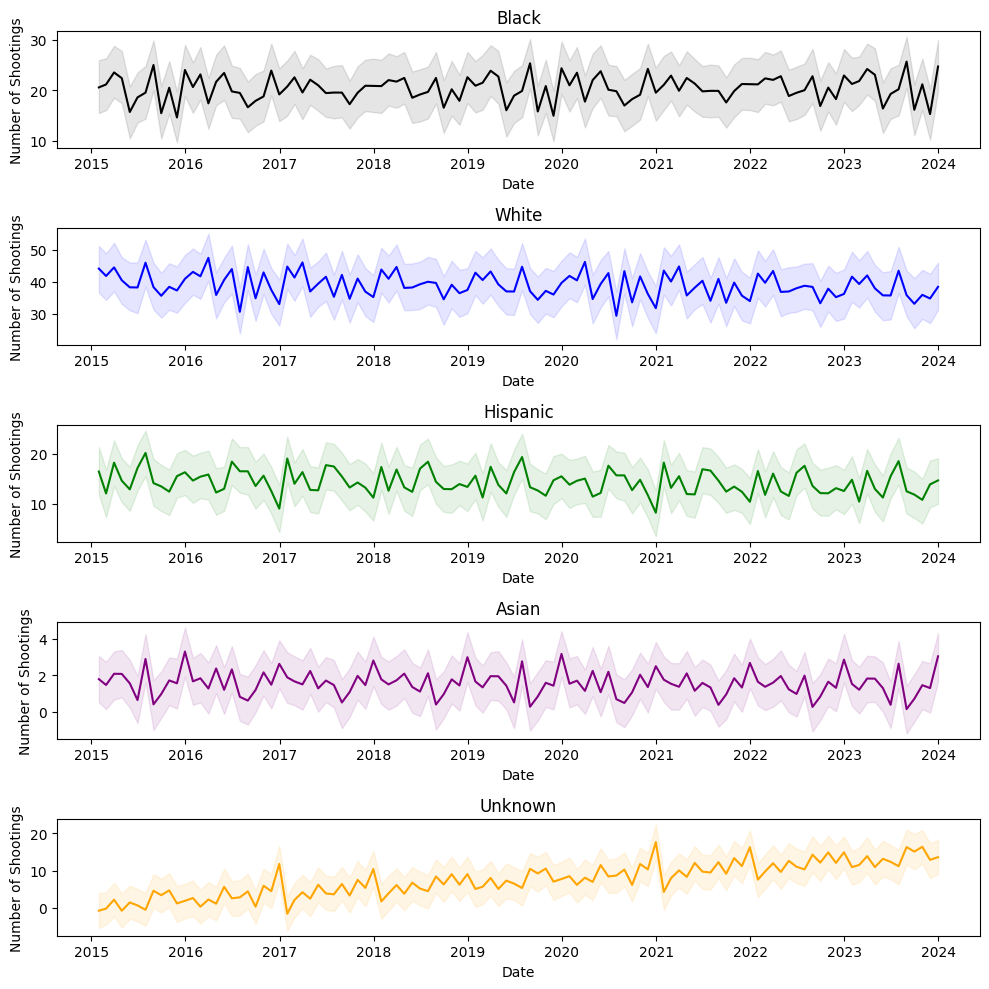

In [42]:
#divide into 3 vertical subplots

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

ax[0].plot(forecast_black['ds'], forecast_black['yhat'], label='Black', color='black')
ax[0].fill_between(forecast_black['ds'], forecast_black['yhat_lower'], forecast_black['yhat_upper'], color='black', alpha=0.1)
ax[0].set_title('Black')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Shootings')

ax[1].plot(forecast_white['ds'], forecast_white['yhat'], label='White', color='blue')
ax[1].fill_between(forecast_white['ds'], forecast_white['yhat_lower'], forecast_white['yhat_upper'], color='blue', alpha=0.1)
ax[1].set_title('White')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Number of Shootings')

ax[2].plot(forecast_hispanic['ds'], forecast_hispanic['yhat'], label='Hispanic', color='green')
ax[2].fill_between(forecast_hispanic['ds'], forecast_hispanic['yhat_lower'], forecast_hispanic['yhat_upper'], color='green', alpha=0.1)
ax[2].set_title('Hispanic')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Number of Shootings')

ax[3].plot(forecast_asian['ds'], forecast_asian['yhat'], label='Asian', color='purple')
ax[3].fill_between(forecast_asian['ds'], forecast_asian['yhat_lower'], forecast_asian['yhat_upper'], color='purple', alpha=0.1)
ax[3].set_title('Asian')
ax[3].set_xlabel('Date')
ax[3].set_ylabel('Number of Shootings')

ax[4].plot(forecast_unknown['ds'], forecast_unknown['yhat'], label='Unknown', color='orange')
ax[4].fill_between(forecast_unknown['ds'], forecast_unknown['yhat_lower'], forecast_unknown['yhat_upper'], color='orange', alpha=0.1)
ax[4].set_title('Unknown')
ax[4].set_xlabel('Date')
ax[4].set_ylabel('Number of Shootings')



plt.tight_layout()
plt.show()

In [43]:
# now put scatter points for actual data

# Black
data_black_fut = data_black[data_black['ds'] >= '2022-01-01']
data_black_fut = data_black_fut[data_black_fut['ds'] < '2024-01-01']

# White
data_white_fut = data_white[data_white['ds'] >= '2022-01-01']
data_white_fut = data_white_fut[data_white_fut['ds'] < '2024-01-01']

# Hispanic
data_hispanic_fut = data_hispanic[data_hispanic['ds'] >= '2022-01-01']
data_hispanic_fut = data_hispanic_fut[data_hispanic_fut['ds'] < '2024-01-01']

# Asian
data_asian_fut = data_asian[data_asian['ds'] >= '2022-01-01']
data_asian_fut = data_asian_fut[data_asian_fut['ds'] < '2024-01-01']

# Unknown
data_unknown_fut = data_unknown[data_unknown['ds'] >= '2022-01-01']
data_unknown_fut = data_unknown_fut[data_unknown_fut['ds'] < '2024-01-01']




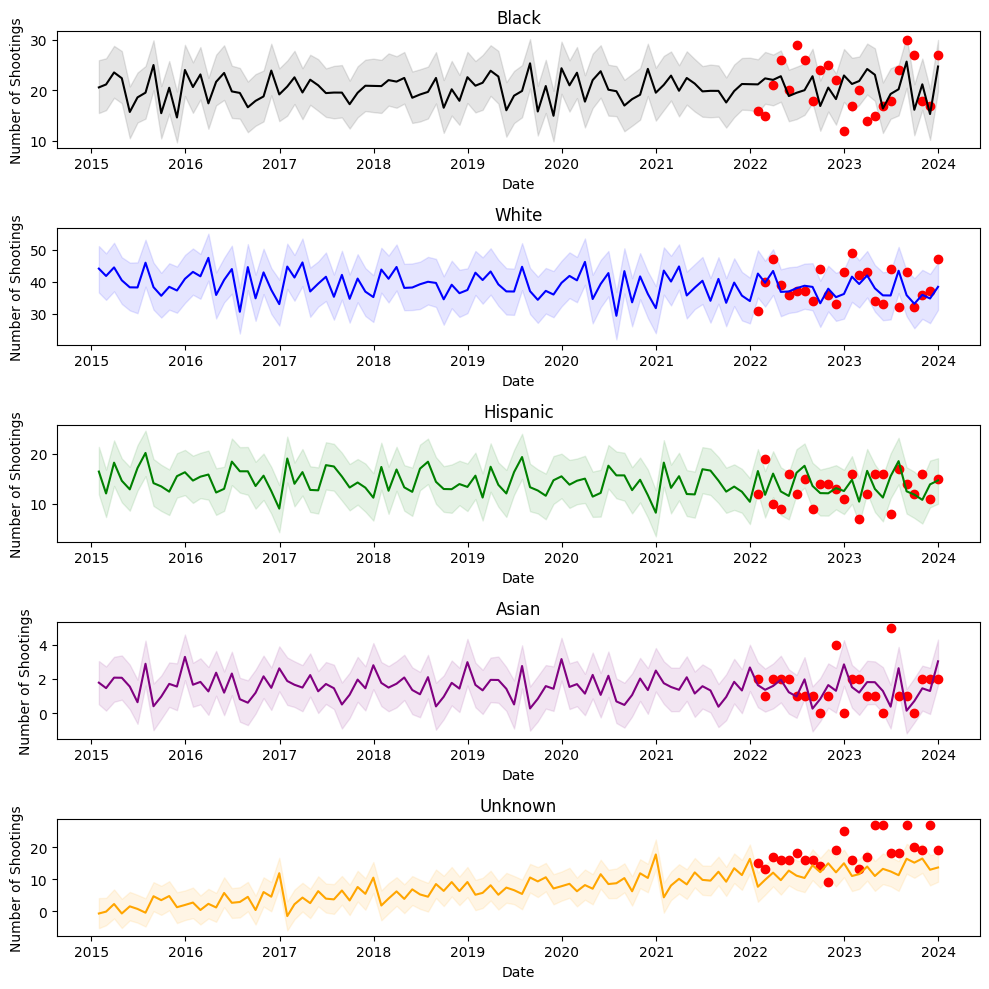

In [44]:

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

ax[0].plot(forecast_black['ds'], forecast_black['yhat'], label='Black', color='black')
ax[0].fill_between(forecast_black['ds'], forecast_black['yhat_lower'], forecast_black['yhat_upper'], color='black', alpha=0.1)
ax[0].scatter(data_black_fut['ds'], data_black_fut['y'], label='Actual', color='red')
ax[0].set_title('Black')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Shootings')

ax[1].plot(forecast_white['ds'], forecast_white['yhat'], label='White', color='blue')
ax[1].fill_between(forecast_white['ds'], forecast_white['yhat_lower'], forecast_white['yhat_upper'], color='blue', alpha=0.1)
ax[1].scatter(data_white_fut['ds'], data_white_fut['y'], label='Actual', color='red')
ax[1].set_title('White')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Number of Shootings')

ax[2].plot(forecast_hispanic['ds'], forecast_hispanic['yhat'], label='Hispanic', color='green')
ax[2].fill_between(forecast_hispanic['ds'], forecast_hispanic['yhat_lower'], forecast_hispanic['yhat_upper'], color='green', alpha=0.1)
ax[2].scatter(data_hispanic_fut['ds'], data_hispanic_fut['y'], label='Actual', color='red')
ax[2].set_title('Hispanic')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Number of Shootings')


ax[3].plot(forecast_asian['ds'], forecast_asian['yhat'], label='Asian', color='purple')
ax[3].fill_between(forecast_asian['ds'], forecast_asian['yhat_lower'], forecast_asian['yhat_upper'], color='purple', alpha=0.1)
ax[3].scatter(data_asian_fut['ds'], data_asian_fut['y'], label='Actual', color='red')
ax[3].set_title('Asian')
ax[3].set_xlabel('Date')
ax[3].set_ylabel('Number of Shootings')

ax[4].plot(forecast_unknown['ds'], forecast_unknown['yhat'], label='Unknown', color='orange')
ax[4].fill_between(forecast_unknown['ds'], forecast_unknown['yhat_lower'], forecast_unknown['yhat_upper'], color='orange', alpha=0.1)
ax[4].scatter(data_unknown_fut['ds'], data_unknown_fut['y'], label='Actual', color='red')
ax[4].set_title('Unknown')
ax[4].set_xlabel('Date')
ax[4].set_ylabel('Number of Shootings')





plt.tight_layout()
plt.show()

# save the plot

if not os.path.exists('time_series'):
    os.makedirs('time_series')

fig.savefig('time_series/forecast_race.png')



